# Question 2


In [133]:
# import packages and functions
include("code/packages.jl")
include("code/summ_stats.jl")
include("code/std_models.jl")

Installing package: DataFrames


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: Statistics


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: CSV


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: PrettyTables


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: GLM


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: MixedModels


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: Polynomials


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: LinearAlgebra


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: Plots


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: PlotlyJS


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: DataFramesMeta


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: FixedEffectModels


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: Zygote


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Installing package: Distributions


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


run_std_models (generic function with 1 method)

In [134]:

# read in the data
raw_data = DataFrame(CSV.File("data/PS3_data.csv"))

# get the headers
headers = names(raw_data);
println(headers);

# assign variables
df = DataFrame()
df[!,:id] = raw_data."firm_id";
df[!,:year] = raw_data."year";
df[!,:obs] = raw_data."obs";
df[!,:i] = raw_data."X39";
df[!,:y] = raw_data."X03";
df[!,:k] = raw_data."X40";
df[!,:l] = raw_data."X43";
df[!,:m] = raw_data."X44";
df[!,:p] = raw_data."X45";
df[!,:wm] = raw_data."X49";
df[!,:ind7] = raw_data."X10";
va_y = exp.(df[!, :y] .+ df[!, :p]) .- exp.(df[!, :m] .+ df[!, :wm]);
va_y = ifelse.(va_y .< 0, missing, va_y);
df[!, :va_y] = log.(va_y);
m_share = df[!, :m] .+ df[!, :wm] - (df[!, :y] .+ df[!, :p]);
df[!, :m_share] = m_share;

data = hcat(df[!, :y], df[!, :i], df[!, :k], df[!, :l], df[!, :m])
vars = [df.y, df.i, df.k, df.l, df.m]
variable_names = ["Output", "Investment", "Capital", "Hours", "Intermediate Consumption"]

# industry 
industry = "X10"; # industry of my choice 
df_industry7 = filter(row -> row[:ind7] == 1, df)
sort!(df_industry7, [:id, :year])

# balanced panel
distinct_years = unique(df.year);
num_distinct_years = length(distinct_years);
df_balanced = df[df.obs .== num_distinct_years, :]
df_industry7_bal = filter(row -> row[:ind7] == 1, df_balanced)
sort!(df_industry7_bal, [:id, :year])

# computation globals
init_params = [1.0,1.0];
err_tol = 1e-6;

["year", "firm_change", "firm_id", "obs", "X03", "X04", "X05", "X06", "X07", "X08", "X09", "X10", "X11", "X12", "X13", "X14", "X15", "X16", "X17", "X18", "X19", "X20", "X21", "X22", "X23", "X24", "X25", "X26", "X27", "X28", "X29", "X30", "X31", "X32", "X33", "X34", "X35", "X36", "X37", "X38", "X39", "X40", "X41", "X42", "X43", "X44", "X45", "X46", "X47", "X48", "X49", "X50", "X51", "X52", "X53", "X54", "X55", "X56", "X57", "X58", "X59", "X60", "X61", "sequence"]



## Part a

**Table 1: Summary Statistics**
$$
\begin{array}{|r|r|r|r|r|r|r|}
  \hline
  \textbf{Variable} & \textbf{Observations} & \textbf{Mean} & \textbf{Median} & \textbf{Std Dev} & \textbf{25th Percentile} & \textbf{75th Percentile} \\
  \hline
  \text{Output} & 11393 & 13.7903 & 13.6358 & 1.82123 & 12.2636 & 15.2589 \\
  \text{Investment} & 11393 & 8.77443 & 9.75418 & 4.18482 & 7.61776 & 11.7141 \\
  \text{Capital} & 11393 & 11.9133 & 11.8011 & 2.09978 & 10.1414 & 13.6564 \\
  \text{Hours} & 11393 & 4.90301 & 4.58619 & 1.39403 & 3.66766 & 6.11561 \\
  \text{Intermediate Consumption} & 11393 & 13.2585 & 13.1634 & 1.95939 & 11.7206 & 14.8021 \\
  \hline
\end{array}
$$

**Table 2: Industry-Year Counts**

$$
\begin{array}{|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|r|}
  \hline
  \textbf{year} & \textbf{Ind 1} & \textbf{Ind 2} & \textbf{Ind 3} & \textbf{Ind 4} & \textbf{Ind 5} & \textbf{Ind 6} & \textbf{Ind 7} & \textbf{Ind 8} & \textbf{Ind 9} & \textbf{Ind 10} & \textbf{Ind 11} & \textbf{Ind 12} & \textbf{Ind 13} & \textbf{Ind 14} & \textbf{Ind 15} & \textbf{Ind 16} & \textbf{Ind 17} & \textbf{Ind 18} \\
  \hline
  1990 & 14 & 36 & 50 & 61 & 35 & 9 & 56 & 26 & 15 & 15 & 64 & 16 & 73 & 13 & 37 & 39 & 25 & 13 \\
  1991 & 18 & 60 & 68 & 102 & 53 & 10 & 92 & 43 & 23 & 22 & 97 & 23 & 112 & 29 & 54 & 71 & 46 & 20 \\
  1992 & 23 & 75 & 86 & 124 & 58 & 11 & 108 & 52 & 27 & 25 & 127 & 28 & 133 & 37 & 70 & 86 & 58 & 25 \\
  1993 & 24 & 74 & 84 & 112 & 63 & 12 & 99 & 56 & 25 & 28 & 136 & 30 & 126 & 36 & 74 & 84 & 65 & 25 \\
  1994 & 29 & 85 & 92 & 119 & 75 & 11 & 105 & 59 & 22 & 35 & 129 & 25 & 129 & 35 & 76 & 85 & 72 & 24 \\
  1995 & 32 & 86 & 92 & 123 & 80 & 9 & 106 & 59 & 24 & 40 & 128 & 25 & 131 & 32 & 68 & 86 & 77 & 24 \\
  1996 & 34 & 91 & 88 & 125 & 84 & 9 & 100 & 59 & 25 & 41 & 126 & 23 & 132 & 41 & 69 & 92 & 80 & 24 \\
  1997 & 35 & 91 & 88 & 163 & 93 & 14 & 118 & 70 & 30 & 44 & 135 & 19 & 139 & 50 & 86 & 103 & 95 & 29 \\
  1998 & 30 & 88 & 85 & 160 & 90 & 12 & 112 & 67 & 31 & 39 & 128 & 18 & 135 & 46 & 83 & 101 & 92 & 26 \\
  1999 & 29 & 71 & 71 & 137 & 76 & 9 & 91 & 58 & 27 & 27 & 107 & 15 & 121 & 32 & 72 & 81 & 84 & 22 \\
  \hline
\end{array}
$$

**Table 3: Zeroes**
$$
\begin{array}{|r|r|r|r|}
  \hline
  \textbf{year} & \textbf{Zero Investment} & \textbf{Zero Labour} & \textbf{Zero Materials} \\
  \hline
  1990 & 74 & 0 & 0 \\
  1991 & 143 & 0 & 0 \\
  1992 & 189 & 0 & 0 \\
  1993 & 239 & 0 & 0 \\
  1994 & 215 & 0 & 0 \\
  1995 & 196 & 0 & 0 \\
  1996 & 179 & 0 & 0 \\
  1997 & 193 & 0 & 0 \\
  1998 & 137 & 0 & 0 \\
  1999 & 112 & 0 & 0 \\
  \hline
\end{array}
$$



## Part b: Balanced Panel

**Table 1: Summary Statistics**
$$
\begin{array}{|r|r|r|r|r|r|r|}
  \hline
  \textbf{Variable} & \textbf{Observations} & \textbf{Mean} & \textbf{Median} & \textbf{Std Dev} & \textbf{25th Percentile} & \textbf{75th Percentile} \\\hline
  Output & 2470 & 14.0358 & 14.1047 & 1.6304 & 12.5887 & 15.3642 \\
  Investment & 2470 & 9.44331 & 10.2731 & 3.75307 & 8.4784 & 11.9286 \\
  Capital & 2470 & 12.321 & 12.2325 & 1.86071 & 10.8466 & 13.8514 \\
  Hours & 2470 & 5.15916 & 5.07243 & 1.26825 & 4.00891 & 6.2508 \\
  Intermediate Consumption & 2470 & 13.4876 & 13.5886 & 1.75933 & 12.0704 & 14.8781 \\\hline
\end{array}
$$

**Table 2: Industry-Year Counts**
$$
\begin{array}{|r|r|r|r|r|r|r|r|}
  \hline
  \textbf{year} & \textbf{Ind 1} & \textbf{Ind 2} & \textbf{Ind 3} & \textbf{Ind 4} & \textbf{Ind 5} & \textbf{Ind 6} & \textbf{Ind 7} & \textbf{Ind 8} & \textbf{Ind 9} & \textbf{Ind 10} & \textbf{Ind 11} & \textbf{Ind 12} & \textbf{Ind 13} & \textbf{Ind 14} & \textbf{Ind 15} & \textbf{Ind 16} & \textbf{Ind 17} & \textbf{Ind 18} \\
  1990 & 7 & 21 & 15 & 27 & 15 & 3 & 27 & 13 & 6 & 6 & 26 & 5 & 33 & 5 & 10 & 15 & 10 & 3 \\
  1991 & 6 & 21 & 14 & 26 & 15 & 3 & 27 & 14 & 6 & 6 & 26 & 5 & 33 & 5 & 10 & 16 & 11 & 3 \\
  1992 & 7 & 21 & 14 & 26 & 14 & 3 & 27 & 14 & 6 & 6 & 26 & 5 & 33 & 5 & 10 & 16 & 11 & 3 \\
  1993 & 7 & 21 & 14 & 26 & 14 & 3 & 27 & 14 & 6 & 6 & 26 & 5 & 33 & 5 & 10 & 16 & 11 & 3 \\
  1994 & 7 & 21 & 14 & 26 & 14 & 3 & 27 & 14 & 6 & 6 & 26 & 5 & 33 & 5 & 10 & 16 & 11 & 3 \\
  1995 & 7 & 21 & 14 & 27 & 14 & 3 & 28 & 13 & 6 & 6 & 26 & 5 & 32 & 5 & 10 & 16 & 11 & 3 \\
  1996 & 7 & 21 & 14 & 27 & 14 & 3 & 28 & 13 & 6 & 6 & 26 & 5 & 32 & 5 & 10 & 16 & 11 & 3 \\
  1997 & 6 & 21 & 14 & 28 & 14 & 3 & 28 & 13 & 6 & 6 & 26 & 5 & 32 & 5 & 10 & 16 & 11 & 3 \\
  1998 & 6 & 21 & 14 & 27 & 14 & 4 & 27 & 13 & 6 & 6 & 26 & 5 & 33 & 5 & 10 & 16 & 11 & 3 \\
  1999 & 6 & 21 & 14 & 27 & 13 & 4 & 27 & 13 & 7 & 6 & 26 & 5 & 33 & 5 & 10 & 16 & 11 & 3 \\\hline
\end{array}
$$

**Table 3: Zeroes**
$$
\begin{array}{|r|r|r|r|}
  \hline
  \textbf{year} & \textbf{Zero Investment} & \textbf{Zero Labour} & \textbf{Zero Materials} \\
\hline
  1990 & 19 & 0 & 0 \\
  1991 & 28 & 0 & 0 \\
  1992 & 29 & 0 & 0 \\
  1993 & 32 & 0 & 0 \\
  1994 & 29 & 0 & 0 \\
  1995 & 29 & 0 & 0 \\
  1996 & 27 & 0 & 0 \\
  1997 & 24 & 0 & 0 \\
  1998 & 16 & 0 & 0 \\
  1999 & 22 & 0 & 0 \\\hline
\end{array}
$$



## Part c - Standard models with balanced panel


In [135]:
include("code/std_models.jl")
using FixedEffectModels

output = run_std_models(df_industry7_bal, "-balanced")
println(output)

Running models with suffix: -balanced

1. OLS Model:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int32}}}}, Matrix{Float64}}

y ~ 1 + k + l + m

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)    Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  2.29052     0.133099   17.21    <1e-44   2.02847      2.55256
k            0.0192697   0.0129866   1.48    0.1390  -0.00629848   0.044838
l            0.201103    0.0223843   8.98    <1e-16   0.157032     0.245174
m            0.776981    0.016814   46.21    <1e-99   0.743877     0.810084
───────────────────────────────────────────────────────────────────────────

2. Fixed Effects (FE) Model:
                          FixedEffectModel                          
Number of obs:               

## Part d - Standard models with unbalanced panel

In [136]:
output = run_std_models(df_industry7, "_unbalanced")
println(output)

Running models with suffix: _unbalanced

1. OLS Model:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int32}}}}, Matrix{Float64}}

y ~ 1 + k + l + m

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  3.01418    0.0697759   43.20    <1e-99  2.87726    3.15111
k            0.0316945  0.00862116   3.68    0.0002  0.0147765  0.0486124
l            0.306652   0.0132045   23.22    <1e-94  0.280739   0.332564
m            0.673593   0.00944373  71.33    <1e-99  0.655061   0.692125
─────────────────────────────────────────────────────────────────────────

2. Fixed Effects (FE) Model:
                          FixedEffectModel                          
Number of obs:                983   Converged:

## Part e 
### Production function estimation in Stata


In [137]:
run(`stata-se -b do code/q2_part5.do`)

Process(`stata-se -b do code/q2_part5.do`, ProcessExited(0))

### ACF

I estimate the first stage using the function ``ACF_firststage``. 
I predict values of $\hat{\phi}$.
I create necessary lagged variables and append it to the dataframe ``ACF_df``. 


In [138]:

# first stage of ACF, predict ϕ_hat, return dataset
include("code/misc.jl")

function ACF_firststage(data::DataFrame, degree::Int)
    poly_data = poly(:m, :k, :l, data, degree = degree) 
    ACF_df = hcat(select(data, [:va_y, :id]), select(poly_data, Not([:term_0_0_1, :term_0_1_0, :term_1_0_0])))
    term_names = names(select(poly_data, Not([:m, :l, :k])))
    
    model = lm(term(:va_y) ~ sum(term.(Symbol.(names(ACF_df, Not(:va_y, :id))))), ACF_df)
    ACF_df.va_y_hat = predict(model, ACF_df)
    ACF_df.ϕ_hat = ACF_df.va_y_hat 
    
    ACF_df = transform(
        groupby(ACF_df, :id),
        :ϕ_hat => (x -> [missing; x[1:end-1]]) => :ϕ_hat_lag,
        :k => (x -> [missing; x[1:end-1]]) => :k_lag,
        :l => (x -> [missing; x[1:end-1]]) => :l_lag
    )
    
    # filter out rows with missing lagged l
    ACF_df = filter(row -> !ismissing(row.ϕ_hat) && !ismissing(row.k_lag) && !ismissing(row.l_lag), ACF_df)
    
    ACF_df.ϕ_hat = Vector{Float64}(ACF_df.ϕ_hat)
    ACF_df.ϕ_hat_lag = Vector{Float64}(ACF_df.ϕ_hat_lag)
    ACF_df.k_lag = Vector{Float64}(ACF_df.k_lag)
    ACF_df.l_lag = Vector{Float64}(ACF_df.l_lag)
    
    return ACF_df
end

ACF_df = ACF_firststage(df_industry7, 2)

# extract variables from ACF_df as arrays
ϕ_hat = ACF_df.ϕ_hat;
k = ACF_df.k;
l = ACF_df.l;
ϕ_hat_lag = ACF_df.ϕ_hat_lag;
k_lag = ACF_df.k_lag;
l_lag = ACF_df.l_lag;


After obtaining the values from the first stage, I write the objective function (moment condition) following ACF (2015).


In [139]:
# write objective function for ACF

function compute_moments(init_params::Vector{Float64}, ϕ_hat_vec::Vector{Float64}, k_vec::Vector{Float64}, l_vec::Vector{Float64}, 
    ϕ_hat_lag_vec::Vector{Float64}, k_lag_vec::Vector{Float64}, l_lag_vec::Vector{Float64})
    """
    Computes objective function for ACF second stage

    Args:
    - init_params: A vector of initial parameter values [β_k, β_l].
    - ϕ_hat, k, l, ϕ_hat_lag, k_lag, l_lag: Vectors containing relevant data columns.

    Returns:
    - A scalar representing the moments calculated from the fitted model.
    """

    # Extract initial parameters
    β_k, β_l = init_params

    # Calculate residuals
    ω = ϕ_hat .- β_k .* k_vec .- β_l .* l_vec
    ω_lag = ϕ_hat_lag_vec .- β_k .* k_lag_vec .- β_l .* l_lag_vec

    # Create squared and cubed lagged residuals
    ω_lag_sq = ω_lag .^ 2
    ω_lag_cube = ω_lag .^ 3

    # Fit a linear model
    # Construct a DataFrame-like design matrix for GLM
    X = hcat(ones(length(ω)), ω_lag, ω_lag_sq, ω_lag_cube)
    coef = X \ ω  

    # Predict values and compute ξ
    ω_hat = X * coef
    ξ = ω .- ω_hat

    # Define instruments and calculate moments
    # Here, we use the arrays `k` and `l_lag` as instruments
    moments = [sum(z .* ξ) / length(z) for z in (k_vec, l_lag_vec)]  # Alternative to mean

    # Instead of matrix multiplication, calculate the scalar of moments
    return sum(moments .^ 2)  # This will give a scalar value
end

# test out objective function calculation
moment_result = compute_moments(init_params, ϕ_hat, k, l, ϕ_hat_lag, k_lag, l_lag)

0.004594440246031139

I plot the objective function. 
It does not look globally convex. 
I don't think I've messed up but please let me know if you spot any bugs. 

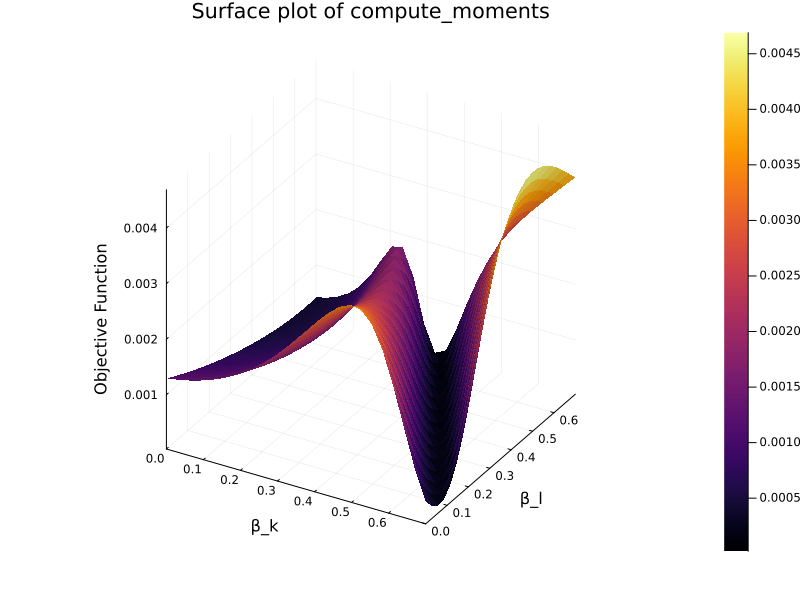

In [140]:
# plot objective function to see what it looks like
x = range(0.0, stop=0.7, length=25)
y = range(0.0, stop=0.7, length=25)
## create meshgrid
X = reshape([xi for xi in x for yi in y], length(x), length(y))
Y = reshape([yi for xi in x for yi in y], length(x), length(y))
Z = zeros(Float64, length(x), length(y))

## compute values over the meshgrid
for i in 1:size(X, 1)
    for j in 1:size(X, 2)
        Z[i, j] = compute_moments([X[i, j], Y[i, j]], ϕ_hat, k, l, ϕ_hat_lag, k_lag, l_lag)
    end
end
fig = Plots.plot(X, Y, Z, st=:surface, xlabel="β_k", ylabel="β_l", zlabel="Objective Function", title="Surface plot of compute_moments", size=(800, 600))
display(fig)


I try my best to make the auto differentiation work even though I've never used it and it took quite a bit of manipulation to get it to run because it doesn't like a lot of things and therefore needed to modify the objective function writing a lot. 

In [141]:
# auto gradient with zygote
function compute_gradient_with_zygote!(arg_vals::Vector{Float64}, ϕ_hat_vec::Vector{Float64}, k_vec::Vector{Float64}, l_vec::Vector{Float64}, 
    ϕ_hat_lag_vec::Vector{Float64}, k_lag_vec::Vector{Float64}, l_lag_vec::Vector{Float64})
    grad_fn = (params) -> compute_moments(params, ϕ_hat_vec, k_vec, l_vec, ϕ_hat_lag_vec, k_lag_vec, l_lag_vec)
    grad = Zygote.gradient(grad_fn, arg_vals)
    return grad
end
compute_gradient_with_zygote!(init_params, ϕ_hat, k, l, ϕ_hat_lag, k_lag, l_lag)

([0.007988227207968605, -0.003917878358374104],)

I am unable to get it to converge. 
But the Nelder-Mead method yields sensible results I think. 
The coefficients are also not too different from those in ACF. 
The value of $\beta_k$ is lower than $\beta_l$. 

In [142]:
# optimisation 
## define the objective function `f`
function f(params)
    return compute_moments(params, ϕ_hat, k, l, ϕ_hat_lag, k_lag, l_lag)
end

## define the gradient function `g!`
function g!(params::Array, storage::Array) 
    storage[:] = compute_gradient_with_zygote!(params, ϕ_hat, k, l, ϕ_hat_lag, k_lag, l_lag)[1]
end

# initial parameters
params = [0.5, 0.5]

# run BFGS optimization, passing both the objective `f` and gradient `g!`
result_NM = optimize(f, g!, params, NelderMead())
result_BFGS = optimize(f, g!, params, BFGS())
# extract the optimized parameters (β_k, β_l)
β_k_NM, β_l_NM = Optim.minimizer(result_NM)
β_k_BFGS, β_l_BFGS = Optim.minimizer(result_BFGS)

println("Nelder-Mead Optimized β_k: ", β_k_NM)
println("Nelder-Mead Optimized β_l: ", β_l_NM)

println("BFGS Optimized β_k: ", β_k_BFGS)
println("BFGS Optimized β_l: ", β_l_BFGS)

Nelder-Mead Optimized β_k: 0.2550260127754881
Nelder-Mead Optimized β_l: 0.820979525172151
BFGS Optimized β_k: NaN
BFGS Optimized β_l: NaN


I also try a grid search which yields a value close to the solution of the NM optimisation. 

In [143]:
# try a grid search
β_k_range = LinRange(-0.1, 1.0, 100)  # Range for β_k from -0.1 to 1.0 with 100 values
β_l_range = LinRange(-0.1, 1.0, 100)  # Range for β_l from -0.1 to 1.0 with 100 values

## initialize best parameters and best objective value
best_params = params
best_objective = Inf

## loop through all combinations of β_k and β_l
for β_k in β_k_range
    for β_l in β_l_range
        params = [β_k, β_l]
        
        # compute the objective function value
        objective_value = f(params)
        
        # If we find a new minimum, update best_params
        if objective_value < best_objective
            best_objective = objective_value
            best_params = params
        end
    end
end

# print the best parameters
println("Best parameters by grid search (β_k, β_l): ", best_params)


Best parameters by grid search (β_k, β_l): [0.2555555555555556, 0.8222222222222222]


I bootstrap standard errors.
For this I write a wrapper function for ACF. 

In [144]:
# bootstrap
using Random

function bstrap(data::DataFrame, fun, reps::Int)
    coefs = Vector{Any}()  
    for i in 1:reps
        sampled_data = DataFrame()  

        for id in unique(data.id)
            firm_data = data[data.id .== id, :] 
            sampled_firm_data = firm_data[rand(1:nrow(firm_data), nrow(firm_data)), :]
            append!(sampled_data, sampled_firm_data)
        end
        
        result = fun(sampled_data)
        push!(coefs, result)
    end
    
    return coefs
end


bstrap (generic function with 1 method)

In [145]:

# wrapper function
function ACF_estimation(data)
    ACF_df = ACF_firststage(data, 2);
    ϕ_hat = ACF_df.ϕ_hat
    k = ACF_df.k
    l = ACF_df.l
    ϕ_hat_lag = ACF_df.ϕ_hat_lag
    k_lag = ACF_df.k_lag
    l_lag = ACF_df.l_lag
    function f(params)
        return compute_moments(params, ϕ_hat, k, l, ϕ_hat_lag, k_lag, l_lag)
    end
    
    ## define the gradient function `g!`
    function g!(params::Array, storage::Array) 
        storage[:] = compute_gradient_with_zygote!(params, ϕ_hat, k, l, ϕ_hat_lag, k_lag, l_lag)[1]
    end
    result_NM = optimize(f, g!, params, NelderMead());
    β_k_NM, β_l_NM = Optim.minimizer(result_NM)
    return β_k_NM, β_l_NM
end

ACF_bs = bstrap(df_industry7, ACF_estimation, 5);
β_k_array = [t[1] for t in ACF_bs];
β_l_array = [t[2] for t in ACF_bs];
β_k_se = std(β_k_array)/ sqrt(length(β_k_array));
β_l_se = std(β_l_array)/ sqrt(length(β_l_array));

println("β_k standard error: ", β_k_se)
println("β_l standard error: ", β_l_se)



β_k standard error: 0.040803567367080185
β_l standard error: 0.13864665750467278


## GNR

I did not get very far. 
I did the first stage and left it at this. 
If I have time at the end of the quarter, I will get to it again. 
But alas I give up for now. 

In [146]:
deg = 3;
# first stage
function calculate_num_interactions(num_vars::Int, degree::Int)
    return binomial(num_vars + degree, degree) - 1 # Subtract 1 to exclude constant
end
num_vars = 3
num_interactions = calculate_num_interactions(num_vars, deg)
init_params = ones(num_interactions+1);
poly_data = poly(:m, :k, :l, df_industry7, degree = deg)
interactions = select(poly_data, Not([:m, :k, :l]))
interactions_matrix = hcat(ones(size(interactions, 1)), Matrix(interactions)) 
k = df_industry7.k
l = df_industry7.l
m = df_industry7.m

m_share = df_industry7.m_share
function residuals(mat::Matrix{Float64}, γ::Vector{Float64}, m::Vector{Float64})
    predicted = log.(mat * γ .+ 1e-8)
    error = m .- predicted
    return error
end
residuals(interactions_matrix, init_params, m_share);

function residuals(mat::Matrix{Float64}, γ::Vector{Float64}, m::Vector{Float64})
    predicted = log.(max.(mat * γ .+ 1e-8, 1e-10)) 
    error = m .- predicted
    return error
end

# get gradient of gnr using zygote 
function compute_gradient1_gnr(γ::Vector{Float64}, mat::Matrix{Float64}, m_share::Vector{Float64})
    grad_fn = (params) -> residuals(mat, params, m_share)  
    jacobian_result = Zygote.jacobian(grad_fn, γ)  
    return jacobian_result
end
res = compute_gradient1_gnr(init_params, interactions_matrix, m_share)

function objective_function(γ::Vector{Float64}, mat::Matrix{Float64}, m_share::Vector{Float64})
    residuals_val = residuals(mat, γ, m_share)
    return sum(residuals_val.^2)  
end
objective_function(init_params, interactions_matrix, m_share)

function f(params)
    return objective_function(params, interactions_matrix, m_share)
end
function g!(params::Array, storage::Array) 
    storage[:] = compute_gradient1_gnr(params, interactions_matrix, m_share)[1]
end

# optimisation
results = optimize(f, g!, init_params, NelderMead())
opt_γ = Optim.minimizer(results)



20-element Vector{Float64}:
  1.4447174364298383
  3.191699962190969
  1.4631424721072235
  0.19530239382367115
  1.9247821987518254
  0.31377185151323134
  0.14245790482131118
  3.308612512235454
 -1.474902895732586
  0.6137400124578218
  2.4957065310640494
  2.5977209821185965
 -1.4961617971110088
  2.779435676066302
  0.6912358769938466
  0.48852814039297754
 -0.3915370492844046
  0.9575237580690354
  1.4499812533816352
 -2.053650997037623